### Project: Classifying Plant Species Using the Iris Dataset with KNN

In [1]:
# The objective of this project is to predict the species of flowers based on their features
# (sepal length, sepal width, petal length, and petal width) from the 'Iris' dataset.

In [2]:
# STEP 1: LOADING THE DATA AND EXPLORING THEM

from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Suppress specific warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Load the dataset
data = load_iris()

# Create a dataframe 
df = pd.DataFrame(data.data, columns=data.feature_names)
df['species'] = data.target

# Explore first few rows
print(df.head())

# Check class distribution
print(df['species'].value_counts())

# Visualize the features
sns.pairplot(df, hue='species')
plt.savefig('pairplot.png')
plt.close()

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  
species
0    50
1    50
2    50
Name: count, dtype: int64


In [3]:
# STEP 2: DATA PROCESSING
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Features (X) and target (y)
X = data.data
y = data.target

# Splitting data into training (80%) and testing (20%) sets
# random state at 42 for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# Standardize the feature values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
# STEP 3: BUILD AND TRAIN THE KNN MODEL
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)

KNeighborsClassifier()

Accuracy: 1.00


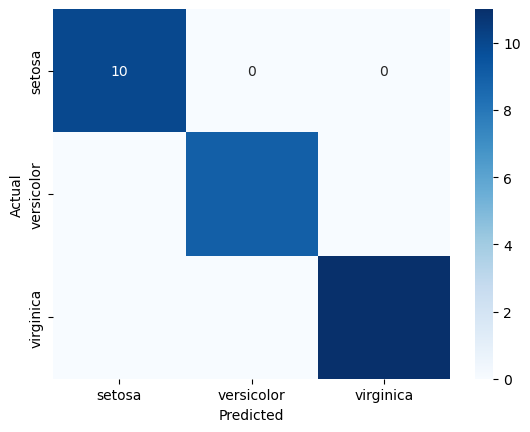

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [5]:
# STEP 4: EVALUATE THE MODEL
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Check accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
plt.savefig('confusionMatrix.png')
plt.close()

# Classification Report
print(classification_report(y_test, y_pred, target_names=data.target_names))

In [6]:
# STEP 5: HYPERPARAMETER TUNING
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11], # tuning the n of neighbors
    'weights': ['uniform', 'distance'], # weights parameter (uniform or distance-based)
    'metric': ['euclidean', 'manhattan', 'minkowski'] # distance metrics
}

# Initialize GridSearchCV
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best parameters
print(f"Best parameters: {grid_search.best_params_}")

# Evaluate the tuned model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(f'Accuracy of the best model: {accuracy_score(y_test, y_pred):.2f}')

Best parameters: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
Accuracy of the best model: 1.00
